<a href="https://colab.research.google.com/github/GeraldineVazquez/EDP-2-/blob/main/Metodo_de_colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Método de Colocación para EDO**

Queremos resolver la ecuación
$$\frac{\ d^2 u}{\ dx^2 } + u =  x$$

Sujeta a las condiciones

$$u(0)=0$$
$$u'(0)=2$$



1.  elegir   $$   {α_0} , {α_1} $$
que satistacen las condiciones dadas

2.   Definir $$E=u''_N +u_N -x $$ y encontrar E en este caso



Usa $$x=1/2$$  $$y$$ $$ x=1$$  como puntos de colocación para econtrar una solución aproximada.





In [39]:
import sympy as sp    # se usa para calculos simbolicos
import numpy as np    # se usa para el manejo de carreglos numericos

import matplotlib.pyplot as plt

In [40]:
x = sp.symbols('x')   #x es una variable
u = sp.Function('u')   # u es una funcion, todavia no le eh dicho de quien es funcion , puedo indicar que sea funcion de x

Para resolver la ecuacion podemos aproximar la solución de la forma que esta definida "ode" el cual calculamos la segunda derivada respecto de x, podemos decir que los hacemos a traves de calcular el error

In [41]:
ode = u(x).diff(x, x)+ u(x) - x   # definimos la funcion, inidico que u es funcion de x, CAlcule la derivada 2 , suma la misma funcion y por ultimo x
sp.dsolve(ode,u(x))# REsuelve la funcion, dando cual es la funcionn

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

Teniendo la solución general ahora calculamos la solucion con las condiciones dadas en al problema

In [42]:
sol = sp.dsolve(ode, ics={u(0): 0, sp.diff(u(x), x).subs(x, 0): 2})  # Aplicamos las condiciones iniciales: u(0)=0 y u'(0)=2
sol


Eq(u(x), x + sin(x))

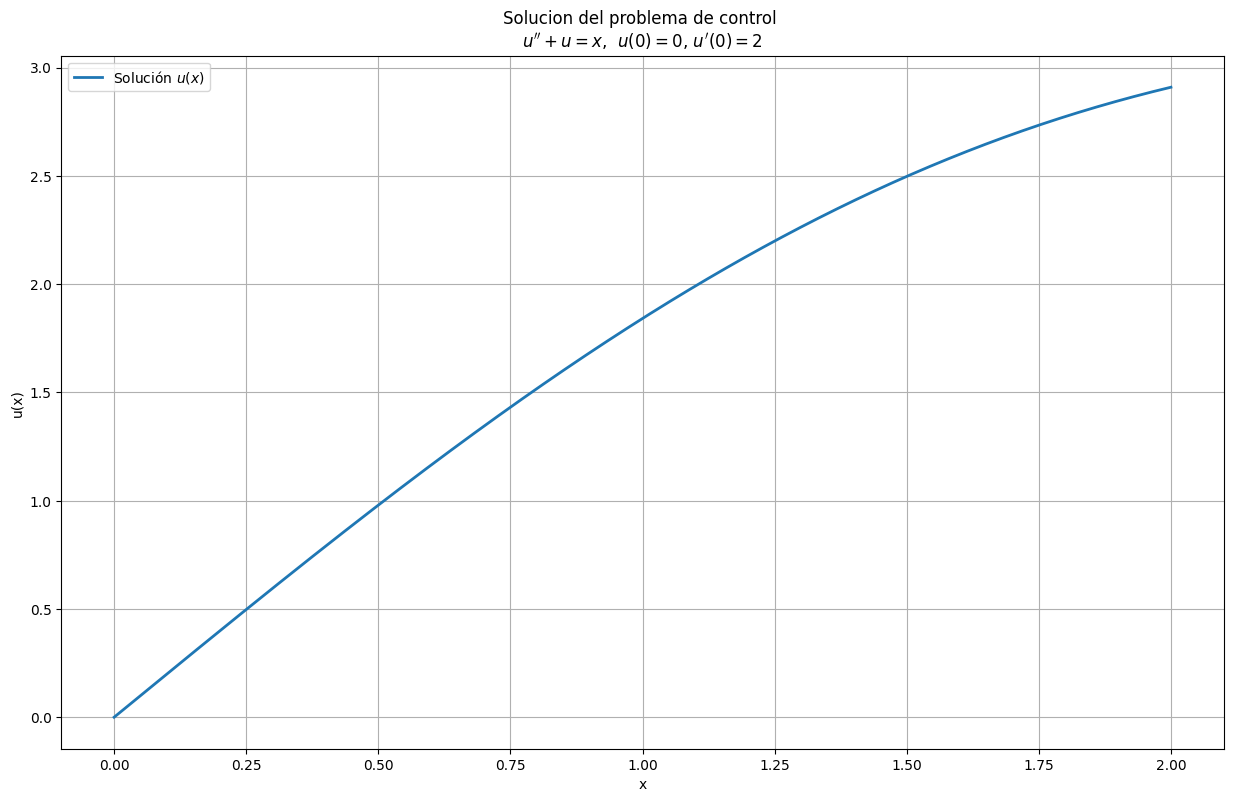

In [43]:
u_expr = sol.rhs  #Convertimos en un arreglo

u_num=sp.lambdify(x, u_expr, "numpy")


xx=np.linspace(0,2,400)
yy=u_num(xx)

plt.figure(figsize=(15, 9))
plt.plot(xx, yy,  label='Solución $u(x)$', linewidth=2)
plt.title('Solucion del problema de control \n$u\'\' + u = x$,  $u(0)=0$, $u\'(0)=2$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()

Inciso 1: Elegir $\alpha_0$ y $\alpha_1$ que satisfagan las condiciones iniciales

In [44]:
a,b=sp.symbols('a b')

In [45]:
#Funcion de prueba u_n que es una solcuión aproximamda de grado 3
u_n=0+ 2*x + a*x*(1-x) + b*x**2*(1-x) #Se puede poner u_2, como definimos en clase aqui sea alpha0=0 y alpha1=2

Elegimos $$α₀=0 , α₁=2$$

Porque el método de colocación solo nos da 2 ecuaciones (porque usamos 2 puntos de colocación),
pero tenemos 4 incógnitas (α₀, α₁, α₂, α₃).

1.   Usamos las 2 condiciones iniciales para eliminar α₀ y α₁.

2.   Quedan solo 2 incógnitas (α₂ y α₃), que sí las resolvemos con los 2 puntos de colocación.


In [46]:
u_n

a*x*(1 - x) + b*x**2*(1 - x) + 2*x

Inciso 2: Definir el residuo $E(x) = u_N''(x) + u_N(x) - x$

In [47]:
u_n_2 = sp.diff(u_n, x, 2)  #Es la segunda derivada de la funcion u_n respecto de x cuantas veces 2

In [48]:
E = u_n_2 + u_n -x

In [49]:
E


a*x*(1 - x) + b*x**2*(1 - x) + x - 2*(a + 2*b*x + b*(x - 1))

Inciso 3: Usar puntos de colocación $x = \frac{1}{2}$ y $x = 1$

In [50]:
#puntos de colocacionn

points = [sp.Rational(1,2), sp.Rational(1,1) ]#sirve para poner la fraccion

points

[1/2, 1]

In [51]:
eqs= [sp.Eq(E.subs(x, p), 0 ) for p in points]
#Resolver para a y b
sol_1=sp.solve(eqs, [a,b])

for eq in eqs:
    print(eq)

Eq(-7*a/4 - 7*b/8 + 1/2, 0)
Eq(-2*a - 4*b + 1, 0)


In [52]:
print("Sistema de ecuaciones simbolico:")
for eq in eqs:
  sp.pprint(eq)

Sistema de ecuaciones simbolico:
  7⋅a   7⋅b   1    
- ─── - ─── + ─ = 0
   4     8    2    
-2⋅a - 4⋅b + 1 = 0


In [53]:
sol_1

{a: 3/14, b: 1/7}

In [54]:
#sustituir en la funcion de prueba
u_approx = u_n.subs(sol_1)

u_approx  # Es la solución por metodo de colocación

x**2*(1 - x)/7 + 3*x*(1 - x)/14 + 2*x

In [55]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

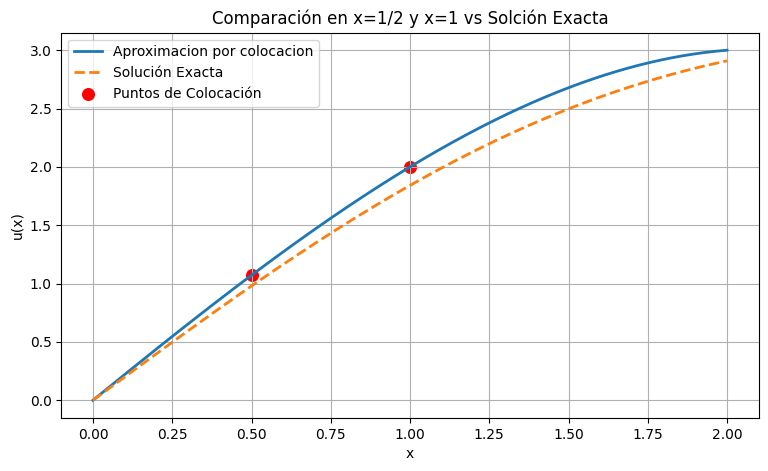

=== SOLUCIÓN EXACTA ===


Eq(u(x), x + sin(x))


=== SOLUCIÓN APROXIMADA POR COLOCACIÓN ===


x**2*(1 - x)/7 + 3*x*(1 - x)/14 + 2*x


=== COMPARACIÓN EN x=1/2 & x=1 vs Exacta ===

       x |     u_exacta(x) |      u_aprox(x) |   Error absoluto |   Error relativo
--------------------------------------------------------------------------------
     0.5 |    0.9794255386 |    1.0714285714 |         9.20e-02 |         9.39e-02
     1.0 |    1.8414709848 |    2.0000000000 |         1.59e-01 |         8.61e-02


In [60]:
#Solucion analitica y numerica
xx = np.linspace(0,2,400)

u_approx_fn = sp.lambdify(x, u_approx, "numpy")

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label='Aproximacion por colocacion', linewidth=2)
plt.plot(xx, yy, '--', label=f'Solución Exacta',linewidth=2)
55
#Puntos de colocacion
plt.scatter([0.5,1.0], u_approx_fn(np.array([0.5,1.0])),
            color='red', s=70, label='Puntos de Colocación')

plt.title('Comparación en x=1/2 y x=1 vs Solción Exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.show()



print("=== SOLUCIÓN EXACTA ===")
display(sol)


print("\n=== SOLUCIÓN APROXIMADA POR COLOCACIÓN ===")
display(u_approx)

# ==================================================================
# COMPARACIÓN EN LOS PUNTOS DE COLOCACIÓN: x = 0.5 y x = 1.0
# ==================================================================



# Puntos de colocación
x_vals = [0.5, 1.0]

print("\n=== COMPARACIÓN EN x=1/2 & x=1 vs Exacta ===\n")
print(f"{'x':>8} | {'u_exacta(x)':>15} | {'u_aprox(x)':>15} | {'Error absoluto':>16} | {'Error relativo':>16}")
print("-" * 80)

for x_val in x_vals:
    # Valor exacto
    u_ex = u_num(x_val)                                # x + sin(x)

    # Valor aproximado (con tu solución correcta)
    u_ap = u_approx_fn(x_val)                          # usa tu función actualizada

    error_abs = abs(u_ex - u_ap)
    error_rel = error_abs / abs(u_ex) if u_ex != 0 else 0

    print(f"{x_val:>8} | {u_ex:>15.10f} | {u_ap:>15.10f} | {error_abs:>16.2e} | {error_rel:>16.2e}")

